<a href="https://colab.research.google.com/github/porkens/myTestRepo/blob/main/Kopia_notatnika_LAB_3_multi_armed_bandit_STARTER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
NUM_TRIALS = 10000
BANDIT_PROBABILITIES = [0.2, 0.5, 0,75]
EPSILON = 0.1

In [ ]:
class Bandit:
  def __init__(self, q):
    self.q = q
    self.q_estimate = 5.
    self.N = 0.

  def pull(self):
    return np.random.random() < self.q

  def update(self, r):
    self.N += 1.
    self.q_estimate = ((self.N - 1)* self.q_estimate + r) / self.N

mean estimate:  0.20269999999999985
mean estimate:  0.0
mean estimate:  0.0
mean estimate:  0.0
total reward earned:  2027.0
overall win rate:  0.2027
num times selected each bandit:  [10000.0, 0.0, 0.0, 0.0]


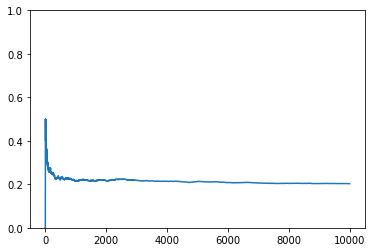

In [ ]:
def experiment_greedy():
  bandits = [Bandit(q) for q in BANDIT_PROBABILITIES]
  rewards = np.zeros(NUM_TRIALS)

  for i in range(NUM_TRIALS):
    j = np.argmax([b.q_estimate for b in bandits])

    r = bandits[j].pull()

    rewards[i] = r

    bandits[j].update(r)

  for b in bandits:
    print("mean estimate: ", b.q_estimate)


  print("total reward earned: ", rewards.sum())
  print("overall win rate: ", rewards.sum() / NUM_TRIALS)
  print("num times selected each bandit: ", [b.N for b in bandits])

  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.ylim([0,1])
  plt.plot(win_rates)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.show()


if __name__ == "__main__": 
  experiment_greedy()

optimal bandit: 3
mean estimate: 5.0
mean estimate: 5.0
mean estimate: 5.0
mean estimate: 1.0
total reward earned: 263.0
overall win rate: 0.0263
num times selected each bandit: [0.0, 0.0, 0.0, 263.0]
num times selected optimal bandit: 263
num times explored: 1051
num times exploited 8949


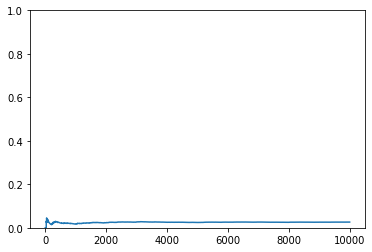

In [ ]:
def experiment_epsilon():

  bandits = [Bandit(q) for q in BANDIT_PROBABILITIES]

  rewards = np.zeros(NUM_TRIALS)

  num_times_explored = 0

  num_times_exploited = 0

  num_optimal = 0

  optimal_bandit = np.argmax([b.q for b in bandits])

  print("optimal bandit:", optimal_bandit)



  for i in range(NUM_TRIALS):

    if np.random.random() < EPSILON:

      num_times_explored += 1

      j = np.random.randint(len(bandits))



    else:

      num_times_exploited += 1

      j = np.argmax([b.q_estimate for b in bandits])



    if j == optimal_bandit:

      num_optimal += 1



      r = bandits[j].pull()



      rewards[i] = r



      bandits[j].update(r)




  for b in bandits:

    print("mean estimate:", b.q_estimate)



  print("total reward earned:", rewards.sum())

  print("overall win rate:", rewards.sum() / NUM_TRIALS)

  print("num times selected each bandit:", [b.N for b in bandits])

  print("num times selected optimal bandit:", num_optimal)

  print("num times explored:", num_times_explored)

  print("num times exploited", num_times_exploited)



  cumulative_rewards = np.cumsum(rewards)

  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)

  plt.ylim([0, 1])

  plt.plot(win_rates)

  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))

  plt.show()



if __name__ == "__main__":

  experiment_epsilon()

mean estimate:  0.5
mean estimate:  0.0
mean estimate:  0.0
mean estimate:  1.0
total reward earned:  9997.0
overall win rate:  0.9997
num times selected each bandit:  [2.0, 1.0, 1.0, 9996.0]


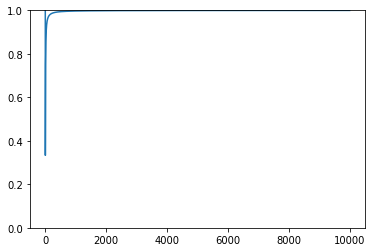

In [ ]:
def experiment_optimistic():
  bandits = [Bandit(q) for q in BANDIT_PROBABILITIES]
  rewards = np.zeros(NUM_TRIALS)

  for i in range(NUM_TRIALS):
    j = np.argmax([b.q_estimate for b in bandits])

    r = bandits[j].pull()

    rewards[i] = r

    bandits[j].update(r)

  for b in bandits:
    print("mean estimate: ", b.q_estimate)


  print("total reward earned: ", rewards.sum())
  print("overall win rate: ", rewards.sum() / NUM_TRIALS)
  print("num times selected each bandit: ", [b.N for b in bandits])

  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.ylim([0,1])
  plt.plot(win_rates)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.show()


if __name__ == "__main__": 
  experiment_greedy()